In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [147]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [105]:
# data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010)),
])

In [143]:
# load training data and testing data
train_set = datasets.CIFAR10(os.getcwd(),train=True,transform=transform_train,target_transform=None,download=False)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=4,shuffle=True)
print(train_set)
print(train_loader)
test_set = datasets.CIFAR10(os.getcwd(),train=False,transform=transform_test,target_transform=None,download=False)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=4,shuffle=False)
print(test_set)
print(test_loader)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\Xinhao
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: C:\Users\Xinhao
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [148]:
# Mini batch
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.0025)
n = 30
train_accuracy = np.zeros(n)
test_accuracy = np.zeros(n)
# endcondition = False
# epoch = 0
# while endcondition == False:
for epoch in range(n):
    running_loss = 0.0
    for i,data in enumerate(train_loader,0):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = net(inputs.view(-1,3,32,32))
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d %5d] loss: %.5f' %
                 (epoch + 1, i + 1, running_loss / 2000))
#             if  running_loss / 2000 < 1.18:
#                 endcondition = True
#                 break
            running_loss = 0.0
#     if endcondition == True:
#         break
#     epoch += 1
    # plot the training accuracy  
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images,labels = data
            outputs = net(images)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_accuracy[epoch] = correct/total
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = net(images)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy[epoch] = correct/total
    
print('Finished Training')            

[1  2000] loss: 2.26926
[1  4000] loss: 2.04831
[1  6000] loss: 1.90862
[1  8000] loss: 1.84924
[1 10000] loss: 1.77302
[1 12000] loss: 1.75524
[2  2000] loss: 1.70623
[2  4000] loss: 1.67220
[2  6000] loss: 1.62723
[2  8000] loss: 1.62096
[2 10000] loss: 1.59600
[2 12000] loss: 1.57964
[3  2000] loss: 1.55305
[3  4000] loss: 1.52144
[3  6000] loss: 1.53106
[3  8000] loss: 1.49167
[3 10000] loss: 1.48250
[3 12000] loss: 1.49426
[4  2000] loss: 1.45935
[4  4000] loss: 1.42336
[4  6000] loss: 1.42300
[4  8000] loss: 1.42693
[4 10000] loss: 1.40018
[4 12000] loss: 1.38296
[5  2000] loss: 1.35758
[5  4000] loss: 1.37442
[5  6000] loss: 1.34068
[5  8000] loss: 1.34873
[5 10000] loss: 1.32251
[5 12000] loss: 1.32342
[6  2000] loss: 1.30934
[6  4000] loss: 1.30419
[6  6000] loss: 1.32020
[6  8000] loss: 1.27165
[6 10000] loss: 1.29825
[6 12000] loss: 1.27110
[7  2000] loss: 1.27938
[7  4000] loss: 1.25666
[7  6000] loss: 1.26321
[7  8000] loss: 1.25436
[7 10000] loss: 1.25794
[7 12000] loss: 

In [149]:
print(test_accuracy)
print(train_accuracy)

[0.3865 0.4617 0.5034 0.5319 0.5636 0.5694 0.6011 0.6061 0.6115 0.6218
 0.6242 0.6369 0.6292 0.6458 0.6395 0.651  0.6397 0.6514 0.6498 0.6676
 0.669  0.6571 0.6583 0.6501 0.6627 0.6688 0.6705 0.6445 0.6669 0.6754]
[0.35108 0.4271  0.4836  0.50714 0.53326 0.54482 0.56648 0.57352 0.58308
 0.59588 0.59702 0.60504 0.6042  0.61632 0.61258 0.61852 0.6156  0.62944
 0.6248  0.64702 0.64748 0.63542 0.64274 0.64014 0.64168 0.64146 0.65842
 0.63356 0.64948 0.6583 ]


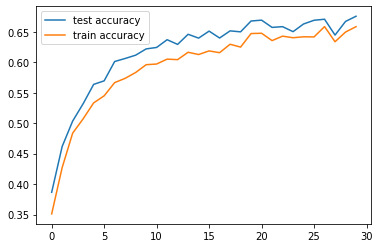

In [150]:
xaxis = range(n)
plt.plot(xaxis,test_accuracy,label='test accuracy')
plt.plot(xaxis,train_accuracy,label='train accuracy')
plt.legend()
plt.show()